<a href="https://colab.research.google.com/github/selfor21/NN-FROM-SCRATCH-LOW-LEVEL/blob/main/C_03_Adding_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install nnfs

In [12]:
import numpy as np
import nnfs
nnfs.init()


In [13]:
import matplotlib.pyplot as plt

In [14]:
from nnfs.datasets import spiral_data

## Adding Hidden Layer

### Input = vector[3,4], weights[4,3], weights2[3,3]


In [15]:
inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1],
          [0.5, -0.91, 0.26, -0.5],
          [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]
biases2 = [-1, 2, -0.5]

In [16]:
layer1_outputs = np.dot(np.array(inputs), np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2
print(layer2_outputs)

[[ 0.50310004 -1.04184985 -2.03874993]
 [ 0.24339998 -2.73320007 -5.76329994]
 [-0.99314     1.41254002 -0.35655001]]


## Training Data

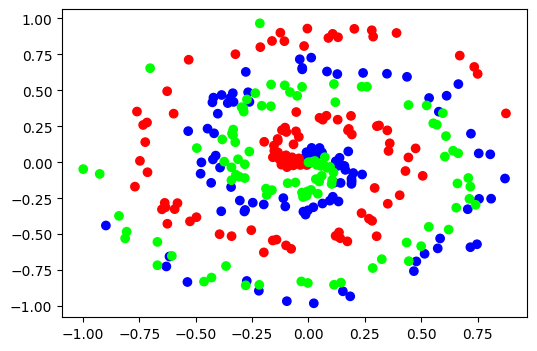

In [19]:
X, y = spiral_data(samples=100, classes=3)

plt.figure(figsize=(6,4))

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'brg')
plt.show()


## Dense Layer Class

In [26]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
      self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
      self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
      self.output = np.dot(inputs, self.weights) + self.biases


# np.random.randn produces Gaussian distribution with mean 0 and variance of 1,
# it will generate random numbers, positive and negative.

In [23]:
# example - weights have n_iputs rows and n_neurons columns.
#it means a layer that receives n_inputs in n_neurons.
l1 = Layer_Dense(3,5)

In [24]:
l1.weights

array([[-0.01461733, -0.0068344 ,  0.00367545,  0.00190312, -0.00851729],
       [ 0.01822724, -0.0052158 , -0.01184687,  0.00960693,  0.01329063],
       [-0.00817493, -0.01401347,  0.01030438, -0.02047324, -0.01226622]],
      dtype=float32)

In [25]:
l1.biases

array([[0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# Example with spiral_data

# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Let's see output of the first few samples:
print(dense1.output[:5])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.1974519e-04 -4.4845550e-05  2.9633660e-05]
 [-2.3960399e-04 -9.0212197e-05  5.8906971e-05]
 [-3.0927541e-04 -2.9433846e-05  1.4666590e-04]
 [-4.4596064e-04 -9.3654569e-05  1.6991388e-04]]
